# The goal of this document is to:

## Compare the socioeconmic variables in communities with good versus poor bridge condition. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import accuracy_score
from random import randrange
import warnings
import math
from sklearn import tree
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn


In [2]:
df = pd.read_csv('df2.csv')

In [3]:
df.head()

,index,TRAFFIC_LANES_ON_028A,ADT_029,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,INSPECT_FREQ_MONTHS_091,HIGHWAY_SYSTEM_104,...,Two or more races,White alone,%Hispanic,%White alone,%Black or African American alone,%American Indian and Alaska Native alone,%Asian alone,%Native Hawaiian and Other Pacific Islander alone,%Some other race alone,%Two or more races
0,182,0.142857,0.261072,0.505051,0.057143,0.081150,0.038436,0.253731,0.04,1,...,13197.0,323498.0,3.046302,69.570959,18.923848,0.095916,4.936235,0.019785,0.568829,2.838126
1,184,0.285714,0.240606,0.434343,0.057143,0.082840,0.036261,0.336887,0.04,1,...,83.0,3703.0,0.000000,94.392047,0.433342,0.000000,1.452970,1.605914,0.000000,2.115728
2,190,0.142857,0.317668,0.545455,0.057143,0.239645,0.099500,0.260128,0.04,1,...,417.0,22516.0,0.640948,90.764704,1.890595,0.004031,4.744629,0.072560,0.201556,1.680977
3,191,0.142857,0.317668,0.353535,0.000000,0.191040,0.048154,0.266525,0.04,1,...,417.0,22516.0,0.640948,90.764704,1.890595,0.004031,4.744629,0.072560,0.201556,1.680977
4,196,0.428571,0.127109,0.101010,0.000000,0.020710,0.001088,0.304904,0.04,1,...,13197.0,323498.0,3.046302,69.570959,18.923848,0.095916,4.936235,0.019785,0.568829,2.838126


In [4]:
df.describe()

,index,TRAFFIC_LANES_ON_028A,ADT_029,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,INSPECT_FREQ_MONTHS_091,HIGHWAY_SYSTEM_104,...,Two or more races,White alone,%Hispanic,%White alone,%Black or African American alone,%American Indian and Alaska Native alone,%Asian alone,%Native Hawaiian and Other Pacific Islander alone,%Some other race alone,%Two or more races
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,...,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,699.152797,0.181056,0.101567,0.263577,0.037108,0.106857,0.052815,0.215384,0.098499,0.412005,...,4853.390177,122336.787176,1.972072,79.614257,11.532155,0.086672,3.774036,0.042328,0.482217,2.496264
std,291.607109,0.147239,0.149449,0.308223,0.081729,0.128291,0.094266,0.126014,0.230752,0.492532,...,6033.761182,145404.431460,1.001180,13.209726,11.535695,0.099104,2.767746,0.197304,0.642771,1.212658
min,182.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.000000,623.000000,0.000000,32.369319,0.115683,0.000000,0.000000,0.000000,0.000000,0.330524
25%,444.000000,0.142857,0.018707,0.000000,0.000000,0.027050,0.003118,0.153518,0.040000,0.000000,...,172.000000,6695.000000,1.218699,69.570959,1.890595,0.000000,1.780314,0.000000,0.106662,1.525387
50%,697.000000,0.142857,0.049429,0.161616,0.000000,0.068470,0.013054,0.194030,0.040000,0.000000,...,467.000000,30781.000000,1.977879,80.437956,8.547846,0.095916,4.258003,0.000000,0.414232,2.838126
75%,942.000000,0.142857,0.114067,0.434343,0.057143,0.139476,0.054391,0.260128,0.040000,1.000000,...,13197.000000,323498.000000,3.046302,91.068240,18.923848,0.095916,4.936235,0.019785,0.568829,2.838126
max,1204.000000,1.000000,0.926265,1.000000,0.828571,1.000000,0.825368,1.000000,1.000000,1.000000,...,13197.000000,323498.000000,6.200655,98.826640,58.900665,0.951173,16.365213,1.605914,4.293263,8.549971


In [5]:
df[df.columns[90:]].info() # information for the socioeconomic and demographic data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 32 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Total population 25 years and over with less than 9th grade                    733 non-null    float64
 1   %Total population 25 years and over with less than 9th grade                   733 non-null    float64
 2   Total population for whom poverty status is determined                         733 non-null    float64
 3   Total population for whom poverty status is determined (Below poverty level)   733 non-null    float64
 4   %Total population for whom poverty status is determined (Below poverty level)  733 non-null    float64
 5   Mean household income (dollars)                                                733 non-null    float64
 6   Total civilian labor force

In [9]:
df['BRIDGE_CONDITION'].value_counts() # checking how many bridges we have from each class 

1    454
2    190
0     89
Name: BRIDGE_CONDITION, dtype: int64

In [10]:
#getting part of the socioeconomic and demographic for the poor bridges 
poor_bridges=df.loc[df['BRIDGE_CONDITION']==0,['Mean household income (dollars)'
                                  ,'Total population',
                                  'Total population for whom poverty status is determined (Below poverty level)',
                                  'Total population 25 years and over with less than 9th grade',
                                 '%White alone',
                                 '%Black or African American alone',
                                 'Unemployment Rate among civilian labor force']].mean()

In [11]:
#getting part of the socioeconomic and demographic for the good bridges 
good_bridges=df.loc[df['BRIDGE_CONDITION']==1,['Mean household income (dollars)','Total population',
                               'Total population for whom poverty status is determined (Below poverty level)',
                                  'Total population 25 years and over with less than 9th grade',
                                 '%White alone',
                                 '%Black or African American alone',
                                 'Unemployment Rate among civilian labor force']].mean()

In [44]:
#poor_bridges

In [12]:
combined_poor_good_data=pd.concat([good_bridges, poor_bridges], axis=1).reset_index() #one df for the data in the previous cells
combined_poor_good_data = combined_poor_good_data.rename(columns={0: 'good bridges', 1: 'poor bridges'})

In [46]:
combined_poor_good_data

,index,good bridges,poor bridges
0,Mean household income (dollars),92381.269328,84540.204533
1,Total population,159709.291667,169074.693182
2,Total population for whom poverty status is de...,23691.367857,25224.261364
3,Total population 25 years and over with less t...,2069.314286,2183.352273
4,%White alone,80.567013,77.865042
5,%Black or African American alone,10.704439,13.554820
6,Unemployment Rate among civilian labor force,4.999937,5.259340


<AxesSubplot:xlabel='index'>

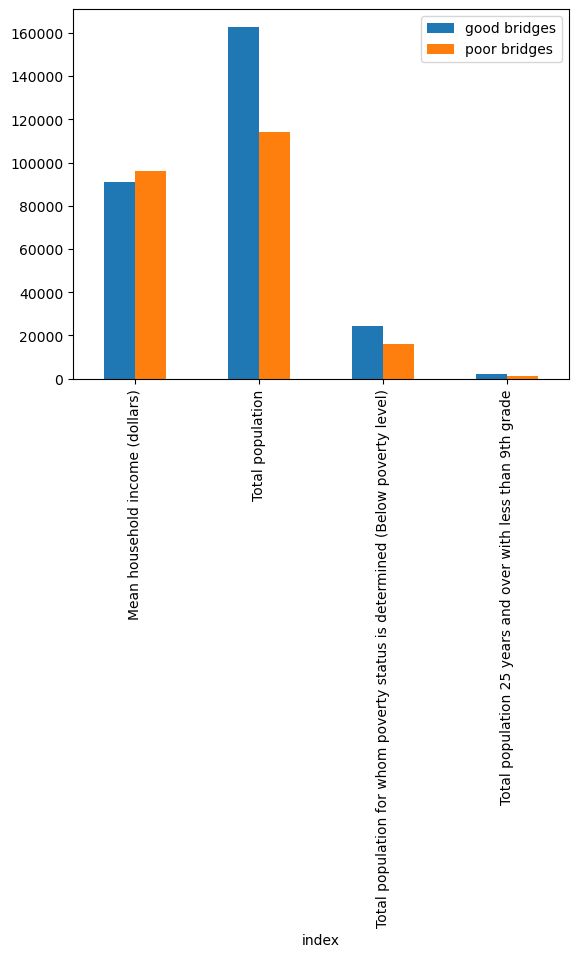

In [13]:
fig, ax = plt.subplots()
combined_poor_good_data[:4].plot.bar(x='index', ax=ax) #plotting the bar grpah of the first 4 coloumns 

<AxesSubplot:xlabel='index'>

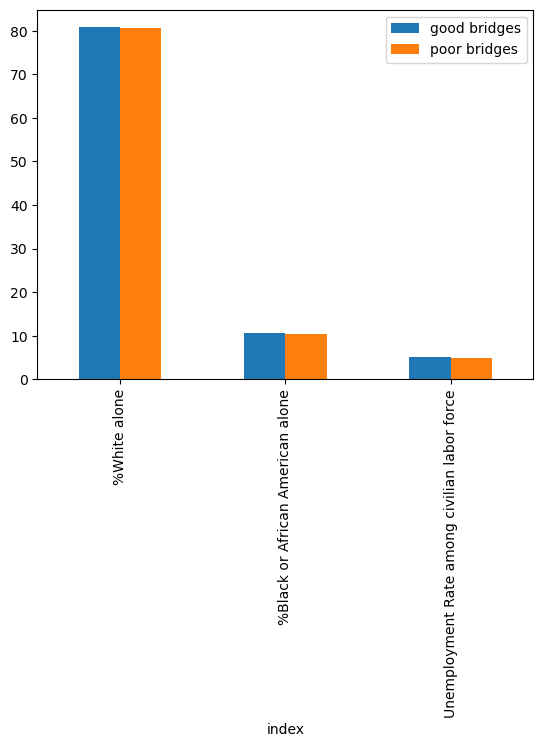

In [14]:
fig, ax = plt.subplots()
combined_poor_good_data[4:].plot.bar(x='index', ax=ax) #plotting the bar grpah of the coloumns 4 until the end

Next, we will check whether there is significant statistical association between the gathered demographic variables and the quality of bridge. The following boxplots show the distribution of the demographic variables in each municipality according to the quality of the bridge. The boxplots show that there is a slightly difference in the mean values between the good and poor quality groups. As a result, we decided to conduct t-test to check if the difference is statistically significant. We found that the only case where the difference is statistically significant is in "%Black or African American alone population".
Later, we conducted a linear regression to assess the association between the demographic predictors and the quality of bridge. None of the predictors was statistically significant. This might provide evidence that the demographic characteristics of a municipality, where the bridge is located, are not relevant when predicting the quality of a bridge. Further inspection is required. 

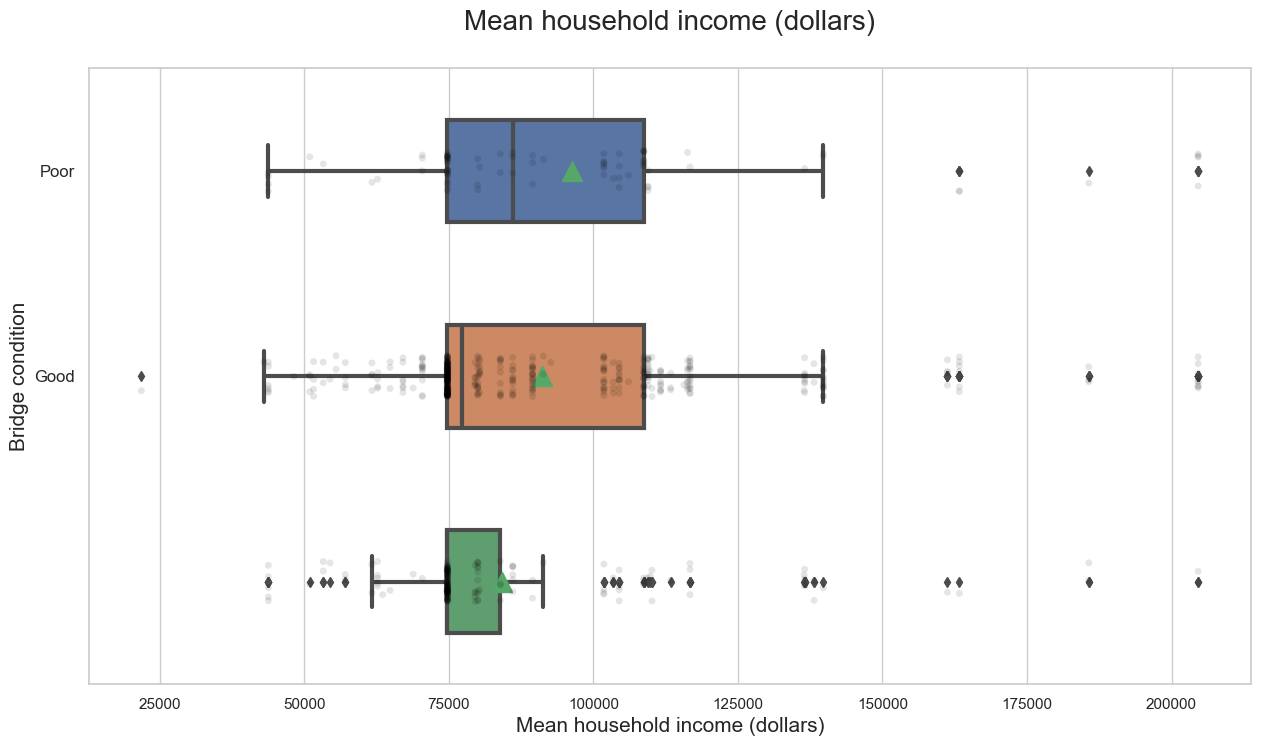

                            OLS Regression Results                            
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     11.71
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           0.000657
Time:                        15:43:44   Log-Likelihood:                -661.49
No. Observations:                 733   AIC:                             1327.
Df Residuals:                     731   BIC:                             1336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


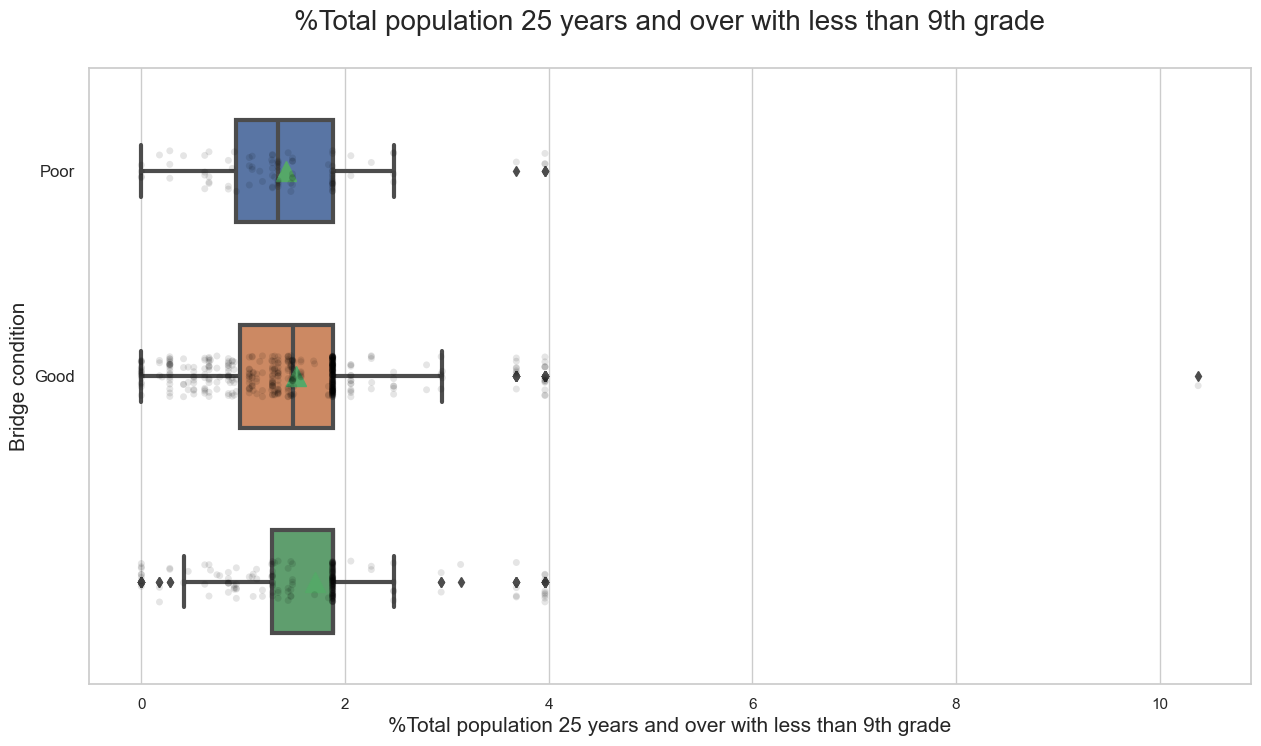

                            OLS Regression Results                            
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.530
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00622
Time:                        15:43:44   Log-Likelihood:                -663.56
No. Observations:                 733   AIC:                             1331.
Df Residuals:                     731   BIC:                             1340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

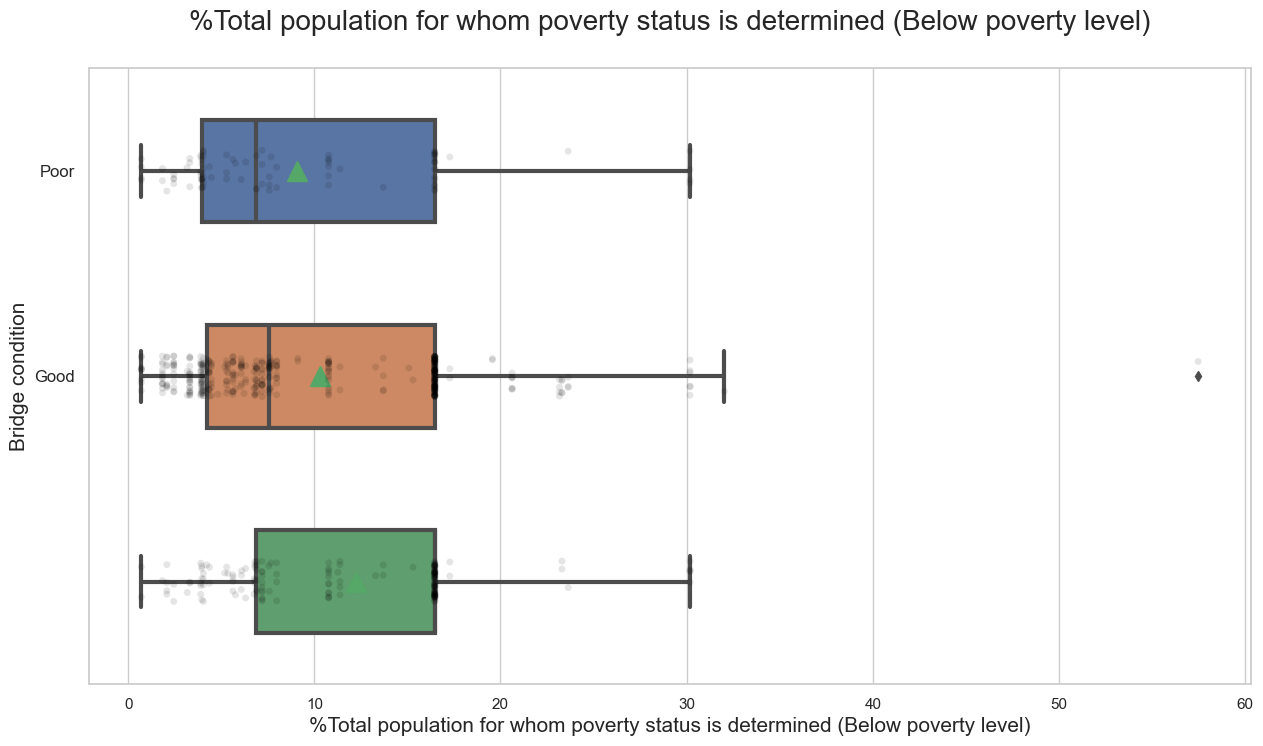

                            OLS Regression Results                            
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     16.07
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           6.73e-05
Time:                        15:43:44   Log-Likelihood:                -659.34
No. Observations:                 733   AIC:                             1323.
Df Residuals:                     731   BIC:                             1332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

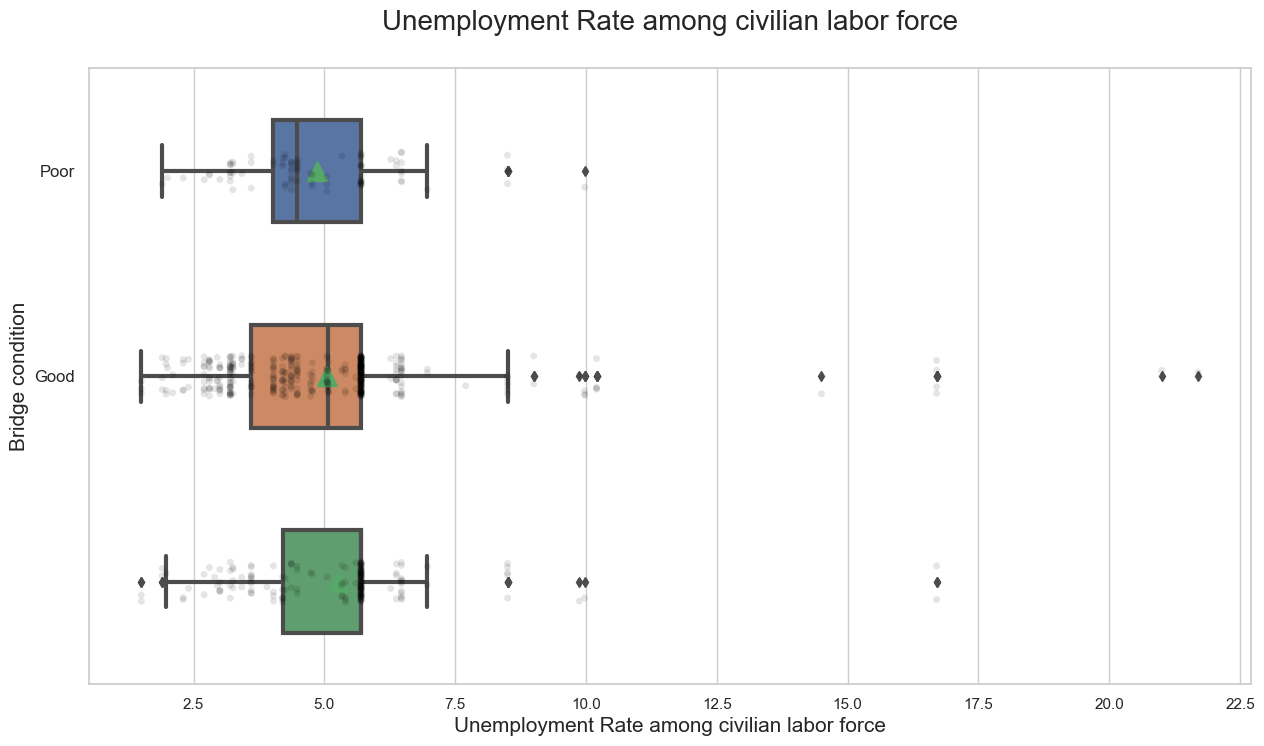

                            OLS Regression Results                            
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.725
Date:                Wed, 14 Dec 2022   Prob (F-statistic):             0.0992
Time:                        15:43:45   Log-Likelihood:                -665.95
No. Observations:                 733   AIC:                             1336.
Df Residuals:                     731   BIC:                             1345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

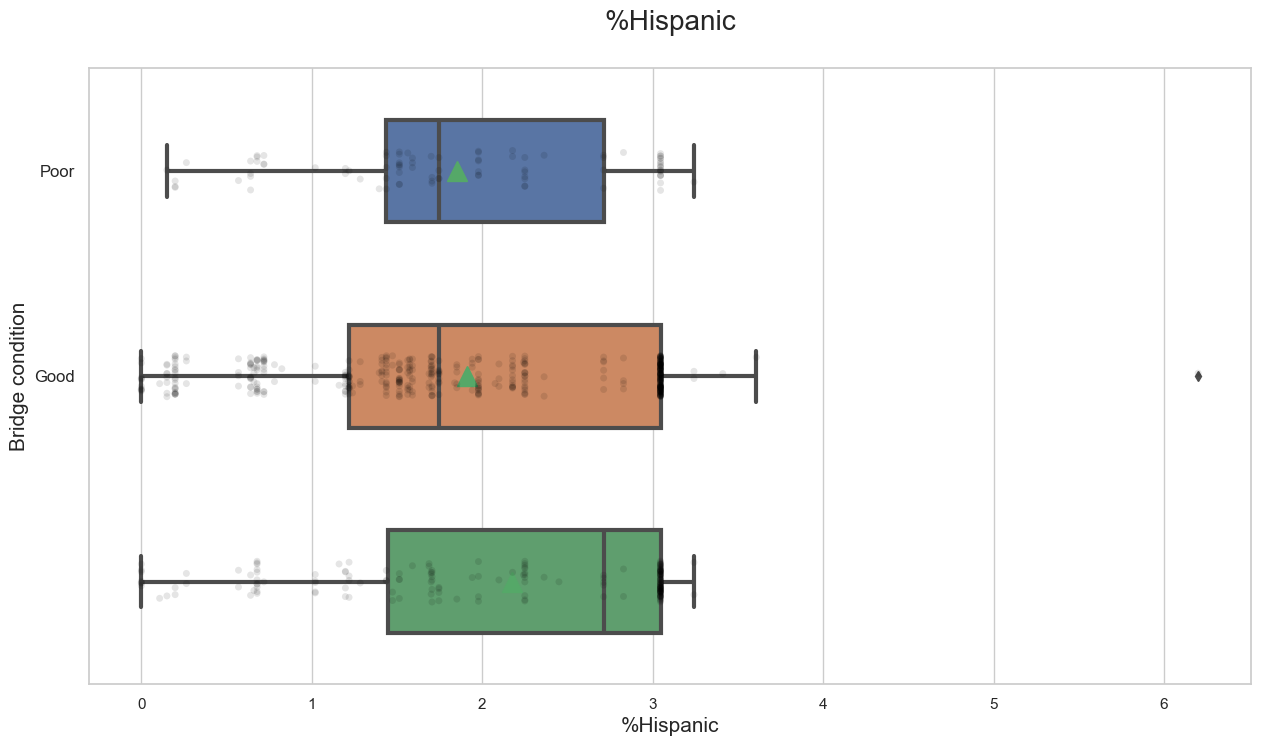

                            OLS Regression Results                            
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     9.094
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00265
Time:                        15:43:45   Log-Likelihood:                -662.78
No. Observations:                 733   AIC:                             1330.
Df Residuals:                     731   BIC:                             1339.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0064      0.049     20.

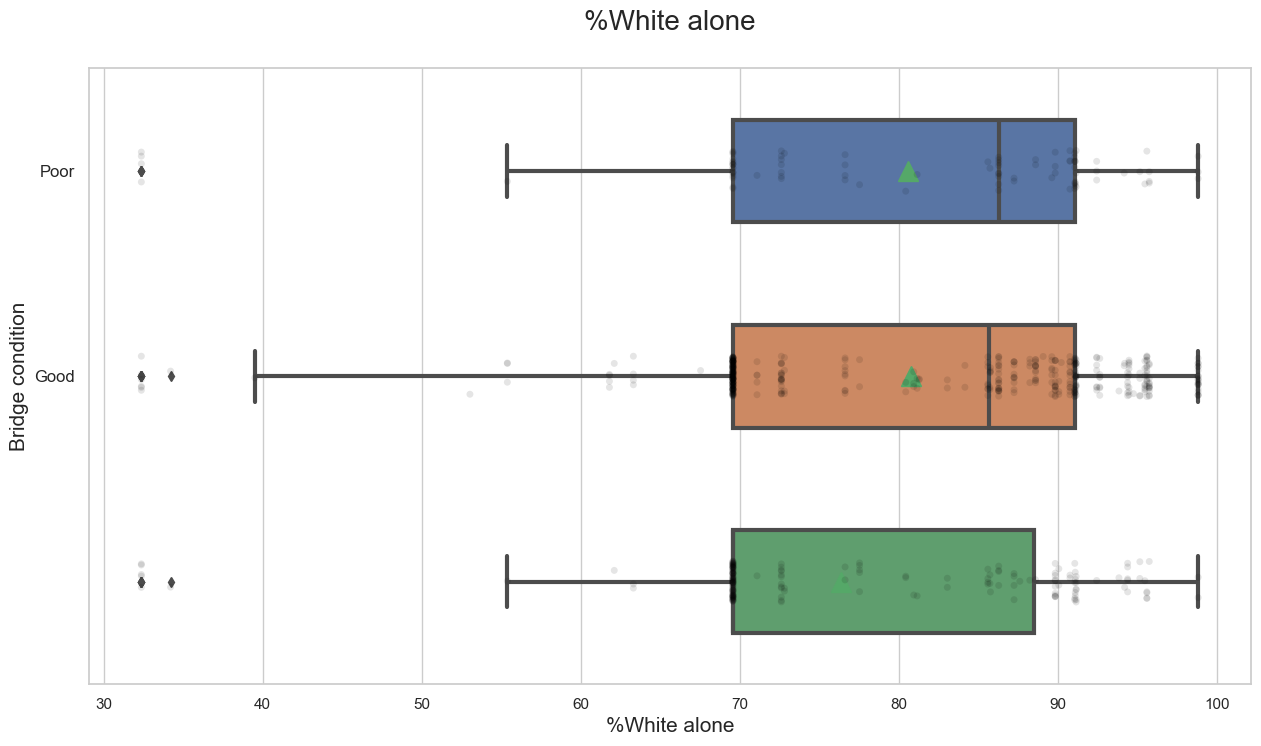

                            OLS Regression Results                            
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     10.92
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           0.000998
Time:                        15:43:45   Log-Likelihood:                -661.88
No. Observations:                 733   AIC:                             1328.
Df Residuals:                     731   BIC:                             1337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5778      0.13

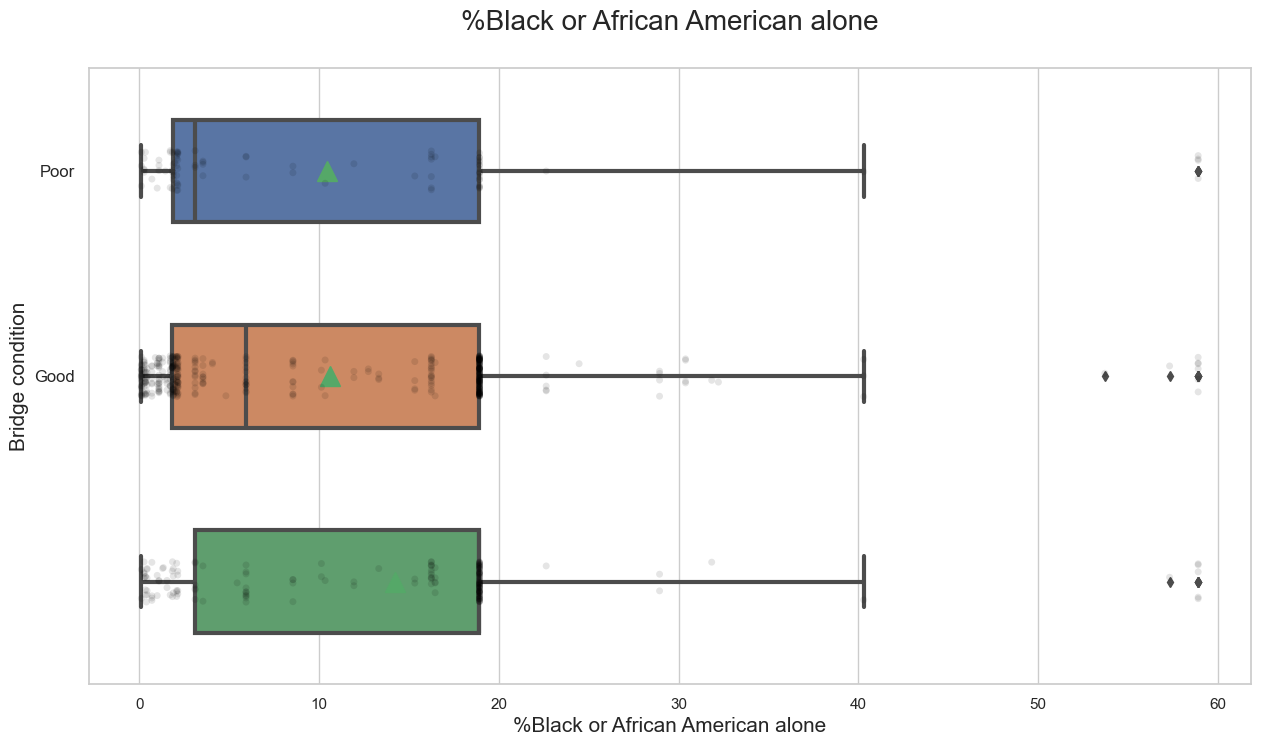

                            OLS Regression Results                            
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     10.72
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00111
Time:                        15:43:46   Log-Likelihood:                -661.98
No. Observations:                 733   AIC:                             1328.
Df Residuals:                     731   BIC:                             1337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

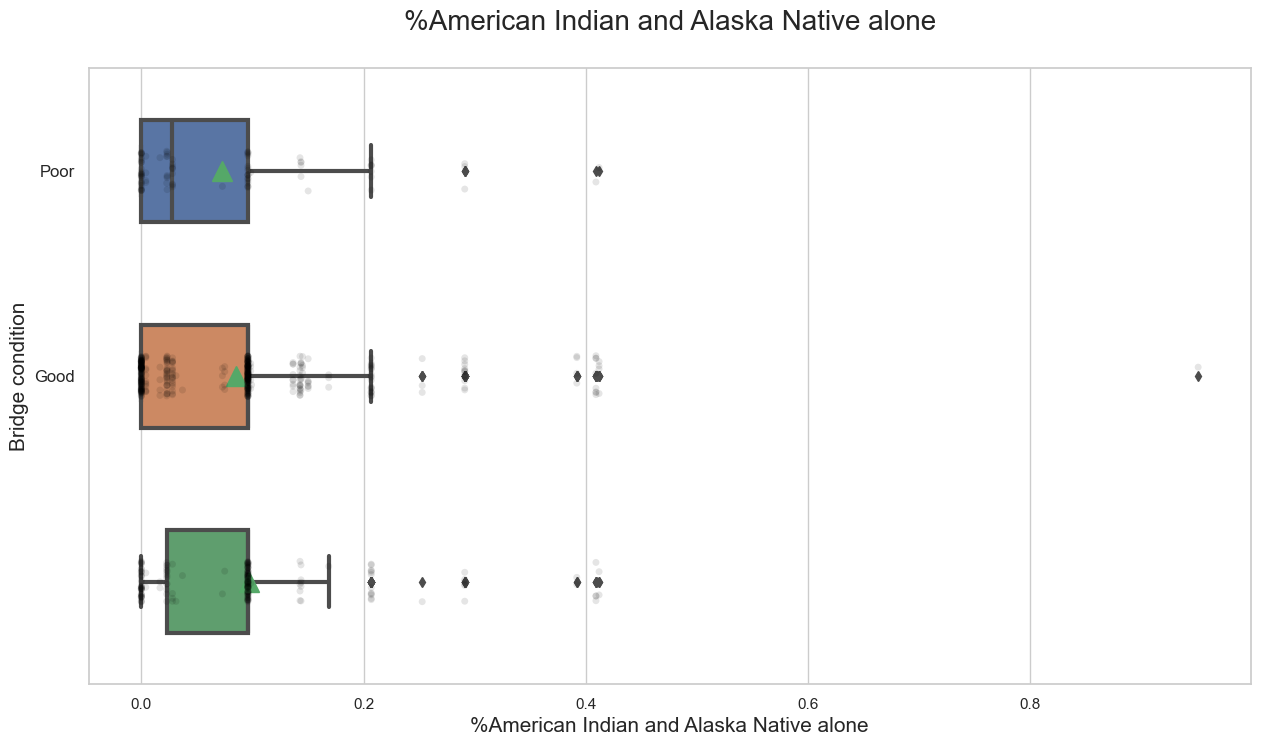

                            OLS Regression Results                            
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.859
Date:                Wed, 14 Dec 2022   Prob (F-statistic):             0.0498
Time:                        15:43:46   Log-Likelihood:                -665.38
No. Observations:                 733   AIC:                             1335.
Df Residuals:                     731   BIC:                             1344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

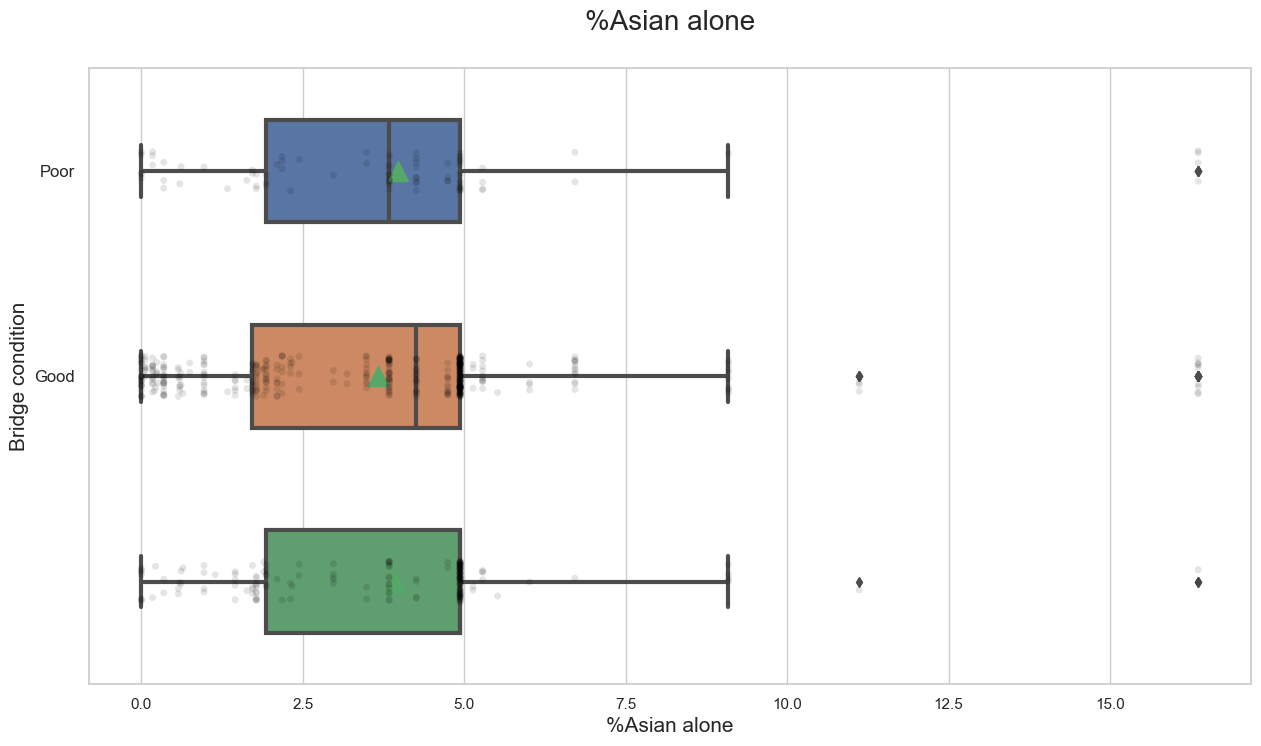

                            OLS Regression Results                            
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05796
Date:                Wed, 14 Dec 2022   Prob (F-statistic):              0.810
Time:                        15:43:46   Log-Likelihood:                -667.29
No. Observations:                 733   AIC:                             1339.
Df Residuals:                     731   BIC:                             1348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1305      0.03

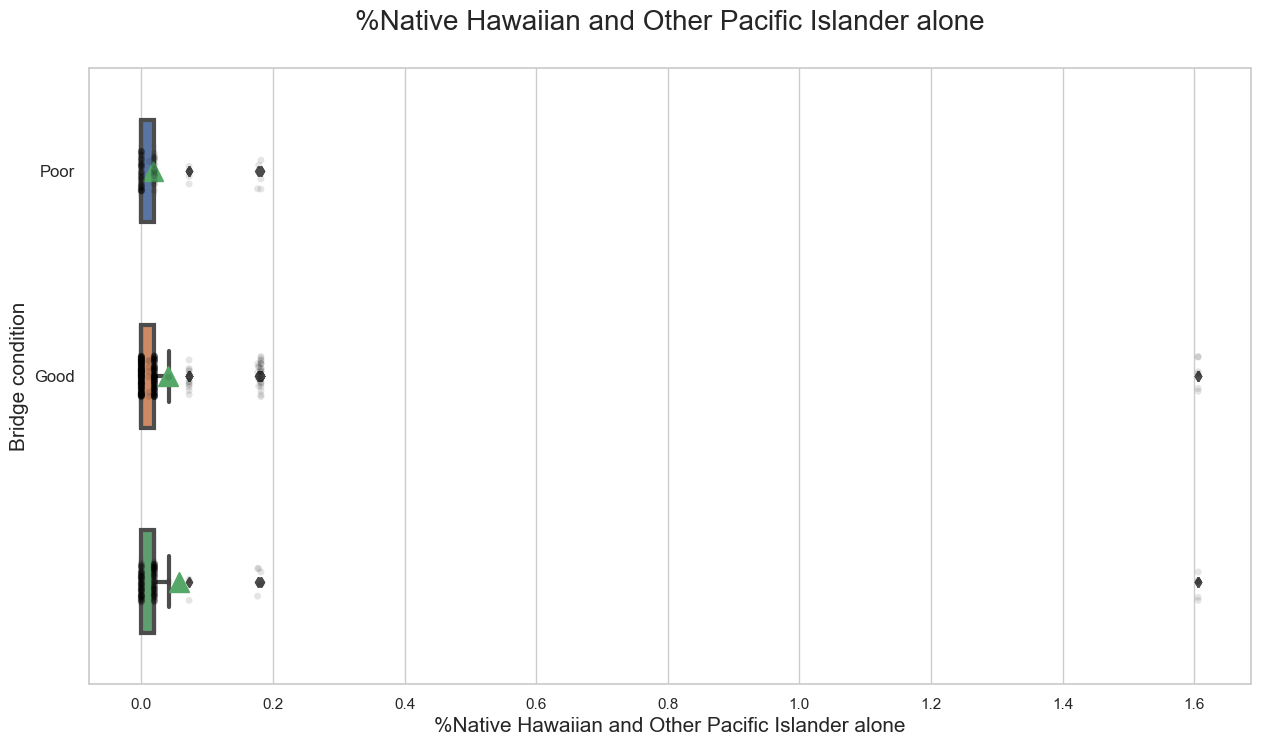

                            OLS Regression Results                            
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.427
Date:                Wed, 14 Dec 2022   Prob (F-statistic):              0.120
Time:                        15:43:46   Log-Likelihood:                -666.10
No. Observations:                 733   AIC:                             1336.
Df Residuals:                     731   BIC:                             1345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [15]:
import statsmodels.formula.api as smf
dem_vars = ['Mean household income (dollars)',
            '%Total population 25 years and over with less than 9th grade', 
            '%Total population for whom poverty status is determined (Below poverty level)',
            "Unemployment Rate among civilian labor force",
            '%Hispanic',
            '%White alone',
            '%Black or African American alone',
            '%American Indian and Alaska Native alone',
            '%Asian alone',
            '%Native Hawaiian and Other Pacific Islander alone']

for var in dem_vars:
    demographic_var = var
    plt.figure(figsize=(15, 8))
    sn.set(style="whitegrid")
    sn.boxplot(x = demographic_var, y = "BRIDGE_CONDITION", 
               data = df, 
               orient = "h", 
               width = 0.5, 
               linewidth = 3, 
               showmeans = True,
               meanprops = {"markersize":"15"})
    sn.stripplot(x = demographic_var, y = "BRIDGE_CONDITION", color = "black", alpha = 0.1, data = df, orient = "h")
    plt.ylabel('Bridge condition', fontsize = 15)
    plt.xlabel(demographic_var, fontsize = 15)
    y = [0, 1]
    labels = ["Poor", "Good"]
    plt.yticks(y, labels, fontsize = 12)
    plt.title(demographic_var+"\n", fontsize = 20)
    plt.show()
    formula = "BRIDGE_CONDITION ~ Q(\""+demographic_var+"\")"
    reg_model = smf.ols(formula = formula, data = df).fit()
    reg_model.summary()
    print(reg_model.summary())
    print("\n")
    print("Is the difference in mean of the "+ demographic_var +" across the good and poor quality groups statistically significant at a 0.05 significance level?\n")
    evltion = reg_model.pvalues[reg_model.pvalues < 0.05].drop("Intercept")
    if len(evltion) == 0:
        print("No")
    else: 
        print("Yes")
    print("\n")

In [119]:
import statsmodels.formula.api as smf
reg_model = smf.ols(formula = 'BRIDGE_CONDITION ~ Q("Mean household income (dollars)") + Q("%Total population 25 years and over with less than 9th grade") + Q("%Total population for whom poverty status is determined (Below poverty level)") + Q("Unemployment Rate among civilian labor force") + Q("%Hispanic") + Q("%White alone") + Q("%Black or African American alone") + Q("%American Indian and Alaska Native alone") + Q("%Asian alone") + Q("%Native Hawaiian and Other Pacific Islander alone")', data = df).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       BRIDGE_CONDITION   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.323
Date:                Sun, 04 Dec 2022   Prob (F-statistic):              0.213
Time:                        15:05:19   Log-Likelihood:                -170.86
No. Observations:                 928   AIC:                             363.7
Df Residuals:                     917   BIC:                             416.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                              1.0331      0.744      1.389      0.165      -0.427       2.493
Q("Mean household income (dollars)")                                                8.948e-07   5.59e-07      1.600      0.110   -2.03e-07    1.99e-06
Q("%Total population 25 years and over with less than 9th grade")                      0.0192      0.014      1.413      0.158      -0.007       0.046
Q("%Total population for whom poverty status is determined (Below poverty level)")    -0.0011      0.004     -0.258      0.796      -0.009       0.007
Q("Unemployment Rate among civilian labor force")                                      0.0038      0.007      0.512      0.609      -0.011       0.019
Q("%Hispanic")                                                                         0.0255      0.019      1.370      0.171      -0.011       0.062
Q("%White alone")                                                                     -0.0026      0.007     -0.356      0.722      -0.017       0.012
Q("%Black or African American alone")                                                 -0.0046      0.008     -0.588      0.556      -0.020       0.011
Q("%American Indian and Alaska Native alone")                                         -0.1138      0.112     -1.015      0.311      -0.334       0.106
Q("%Asian alone")                                                                     -0.0077      0.009     -0.877      0.381      -0.025       0.010
Q("%Native Hawaiian and Other Pacific Islander alone")                                 0.0856      0.055      1.563      0.118      -0.022       0.193
==============================================================================
Omnibus:                      506.110   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2302.404
Skew:                          -2.708   Prob(JB):                         0.00
Kurtosis:                       8.497   Cond. No.                     7.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""